# Introduction
"Hello World"

In [3]:
import pandas as pd

pd?

In [4]:
log = pd.read_csv("../dataset/linux_blame_log.csv")
log.head()

,path,author,timestamp,line
0,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,1448528085000000000,1
1,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,1448528085000000000,2
2,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,1448528085000000000,3
3,drivers/scsi/bfa/bfad_drv.h,Jing Huang,1253753175000000000,4
4,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,1448528085000000000,5


In [6]:
log.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5665947 entries, 0 to 5665946
Data columns (total 4 columns):
path         object
author       object
timestamp    int64
line         int64
dtypes: int64(2), object(2)
memory usage: 971.8 MB


In [7]:
log.author = pd.Categorical(log.author)
log.path = pd.Categorical(log.path)
log.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5665947 entries, 0 to 5665946
Data columns (total 4 columns):
path         category
author       category
timestamp    int64
line         int64
dtypes: category(2), int64(2)
memory usage: 109.9 MB


In [10]:
log.author.value_counts().head(10)

Linus Torvalds           838200
Hans Verkuil             118432
Mauro Carvalho Chehab    102107
Michael Chan              53945
Mike Marciniszyn          44843
Ralph Campbell            42453
Nicholas Bellinger        41823
Laurent Pinchart          40438
Antti Palosaari           40390
Alexander Duyck           39307
Name: author, dtype: int64

In [12]:
log.timestamp = pd.to_datetime(log.timestamp)
log.head()

,path,author,timestamp,line
0,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,1
1,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,2
2,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,3
3,drivers/scsi/bfa/bfad_drv.h,Jing Huang,2009-09-24 00:46:15,4
4,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,5


In [22]:
log['age'] = pd.Timestamp('today') - log.timestamp
log.head()

,path,author,timestamp,line,age,component
0,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,1,939 days 02:58:53.519352,drivers:scsi
1,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,2,939 days 02:58:53.519352,drivers:scsi
2,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,3,939 days 02:58:53.519352,drivers:scsi
3,drivers/scsi/bfa/bfad_drv.h,Jing Huang,2009-09-24 00:46:15,4,3193 days 11:07:23.519352,drivers:scsi
4,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,5,939 days 02:58:53.519352,drivers:scsi


In [23]:
log['component'] = log.path.str.split("/").str[:2].str.join(":")
log.head()

,path,author,timestamp,line,age,component
0,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,1,939 days 02:58:53.519352,drivers:scsi
1,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,2,939 days 02:58:53.519352,drivers:scsi
2,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,3,939 days 02:58:53.519352,drivers:scsi
3,drivers/scsi/bfa/bfad_drv.h,Jing Huang,2009-09-24 00:46:15,4,3193 days 11:07:23.519352,drivers:scsi
4,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,5,939 days 02:58:53.519352,drivers:scsi


In [24]:
components_age = log.groupby('component').age.apply(min)
components_age.head()

component
arch:arc     595 days 17:14:46.519352
arch:arm     127 days 05:51:54.519352
arch:i386   3911 days 04:29:06.519352
arch:ia64   2643 days 22:48:52.519352
arch:mips   1898 days 14:25:02.519352
Name: age, dtype: timedelta64[ns]

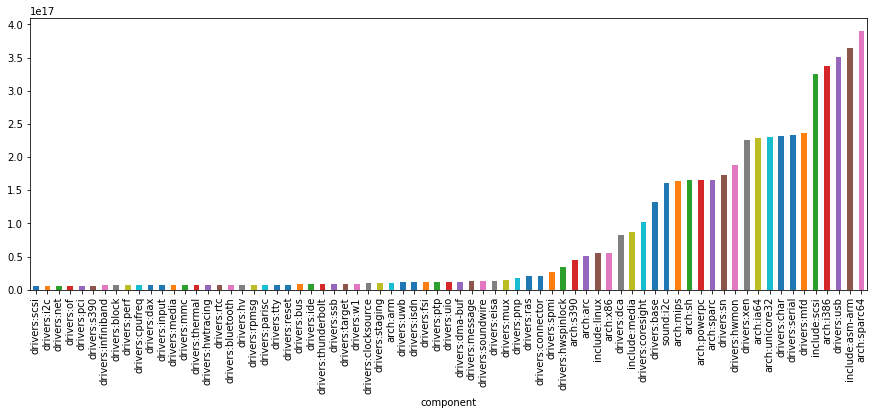

In [26]:
%matplotlib inline
components_age.sort_values().plot.bar(figsize=[15,5])